# NB pour tester la génération de processus sto 

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from generate_BM import gen_N_fbm, variogram, gen_BM, Ito, euler_maruyama

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


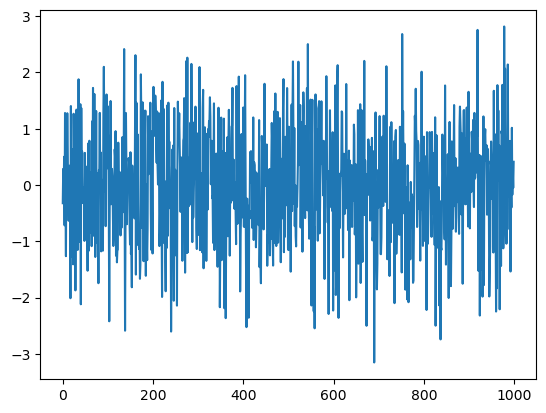

In [15]:
def f(x):
    return 1

N = 10 ** 3
T = 1000
times = np.linspace(0, T, 1000)

list_integrals = []

for t in times:
    list_integrals.append(Ito())

plt.plot(list_integrals) # bizarre le plot on dirait un BM super serré 

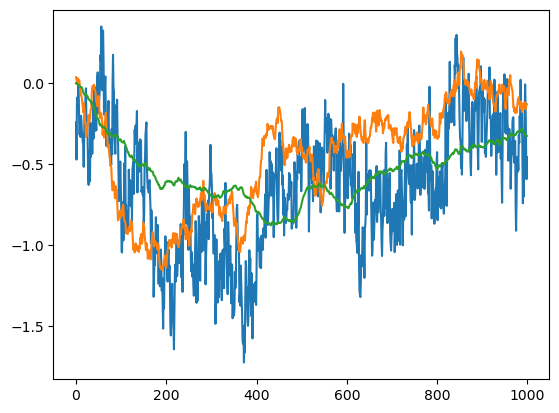

In [ ]:
T = 1000

x_25 = gen_N_fbm(T, 0.25)
x_50 = gen_N_fbm(T, 0.5)
x_75 = gen_N_fbm(T, 0.75)
plt.plot(x_25)
plt.plot(x_50)
plt.plot(x_75)
plt.show()
# note that the curves have been rescaled 

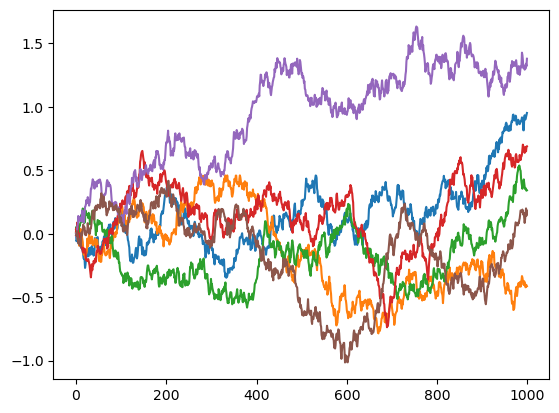

In [5]:
T = 1000
N = 6

x = gen_N_fbm(T, 0.5, N)
for i in range(x.shape[1]):
    plt.plot(x[:,i])

### variogramme de FBM (variogram vs time lag)

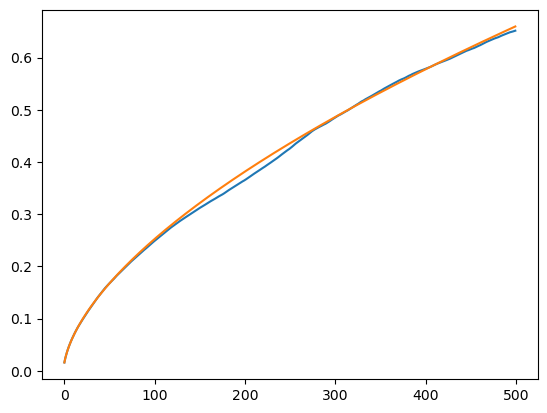

In [87]:
H = 0.3
T = 1000
df = pd.DataFrame(gen_N_fbm(T=T, H=H, N =100))
taus = np.arange(1,501,1)
vario = [variogram(tau=tau, df=df) for tau in taus]
plt.plot(vario)
plt.plot(taus ** (2 * H) / T ** (2*H)) ## valeur th 

### plot de signature 

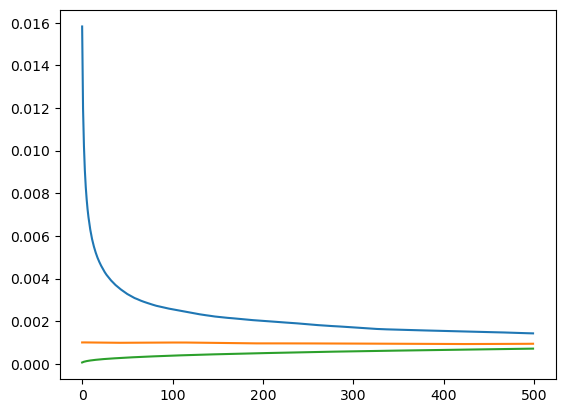

In [88]:
H_30 = 0.3
H_50 = 0.5 
H_70 = 0.7
T = 1000
df_1 = pd.DataFrame(gen_N_fbm(T=T, H=H_30, N =100))
df_2 = pd.DataFrame(gen_N_fbm(T=T, H=H_50, N =100))
df_3 = pd.DataFrame(gen_N_fbm(T=T, H=H_70, N =100))
taus = np.arange(1,501,1)
signature_30 = [variogram(tau=tau, df=df_1) / tau for tau in taus]
signature_50 = [variogram(tau=tau, df=df_2) / tau for tau in taus]
signature_70 = [variogram(tau=tau, df=df_3) / tau for tau in taus]
plt.plot(signature_30)
plt.plot(signature_50)
plt.plot(signature_70)


## On constate que pour H = 0.3 le processus est superdiffusif 


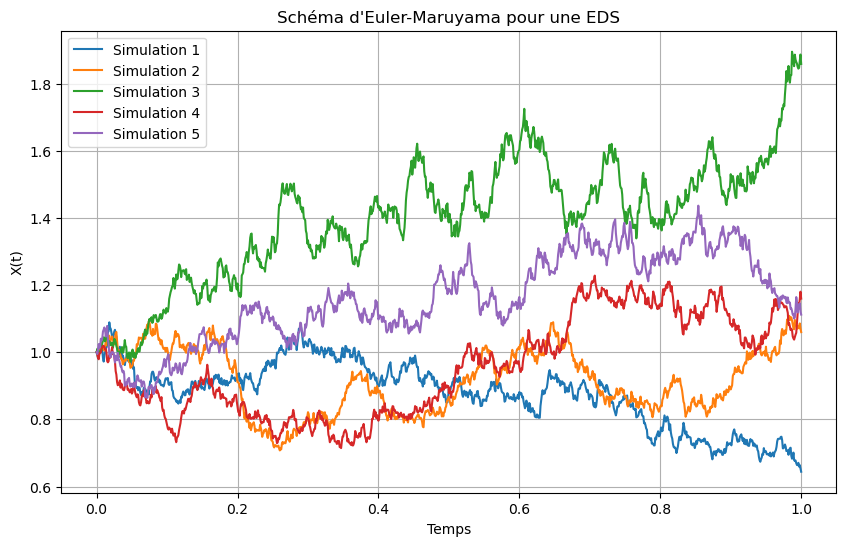

In [ ]:
mu = 0.03           
sigma = 0.4        
x0 = 1           
T = 1.0            
N = 1000           
dt = T / N         
num_simulations = 5 

plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    t, X = euler_maruyama(mu, sigma, x0, T, N)
    plt.plot(t, X, label=f"Simulation {i + 1}")

plt.title("Schéma d'Euler-Maruyama pour une EDS")
plt.xlabel("Temps")
plt.ylabel("X(t)")
plt.legend()
plt.grid()
plt.show()